# 2016 New Coder Survey - Exploratory Analysis

This is a continuation of my previous notebook ([link](https://www.kaggle.com/narimiran/d/freecodecamp/2016-new-coder-survey-/new-coder-survey-univariate-analysis)), where I've made only univariate analysis.

If you have any suggestions, critiques, etc. - please write them below in the comments, I would love to hear them. Thank you!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext watermark

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('../#data-sets/2016-FCC-New-Coders-Survey-Data.csv', low_memory=False)
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


# Creating New Columns

## Gender

Lots of coders didn't answer this question, and small amount of coders are either genderqueer, trans, or agender. We'll group them together in a new column `Genders`.

In [4]:
df['Genders'] = df.Gender.copy()
df.loc[df.Genders.isin(['genderqueer', 'trans', 'agender']) | df.Genders.isnull(), 
       'Genders'] = 'other/NA'

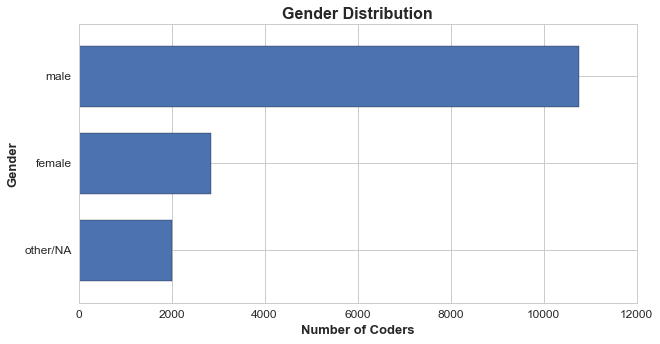

In [5]:
ax = df.Genders.value_counts(ascending=True).plot(kind='barh', width=0.7, figsize=(10,5))
_ = (ax.set_title('Gender Distribution'),
     ax.set_xlabel('Number of Coders'),
     ax.set_ylabel('Gender'))

## Age

We'll make a new column `AgeGroups` where we will have coders divided in five groups by their age.

In [6]:
df['AgeGroups'] = pd.cut(df.Age, [0, 21, 25, 30, 40, 99], 
                         labels=['10-20', '21-24', '25-29', '30-39', '40-86'],
                         right=False)

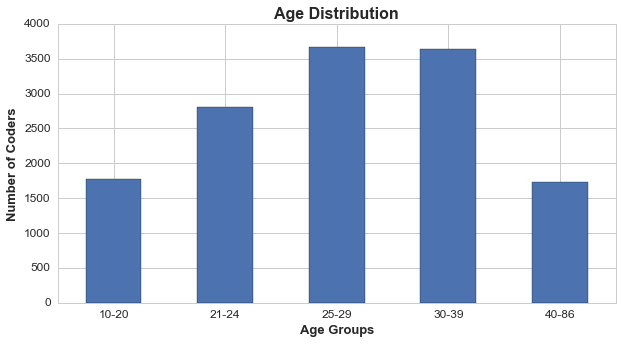

In [7]:
ax = df.AgeGroups.value_counts(sort=False).plot(kind='bar', rot=0, figsize=(10,5))

_ = (ax.set_title('Age Distribution'),
     ax.set_xlabel('Age Groups'),
     ax.set_ylabel('Number of Coders'))

## Months Programming

We'll make a new column `MonthsProgGroups` where we'll divide coders in several groups by their programming experience.

In [8]:
df['MonthsProgGroups'] = pd.cut(df.MonthsProgramming, [0, 6, 24, 999],
                                right=False,
                                labels=['< 6', '6-24', '24+'])

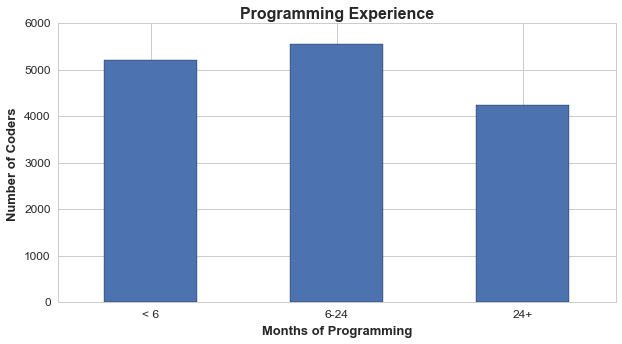

In [9]:
ax = df.MonthsProgGroups.value_counts(sort=False).plot(kind='bar', rot=0, figsize=(10,5))

_ = (ax.set_title('Programming Experience'),
     ax.set_xlabel('Months of Programming'),
     ax.set_ylabel('Number of Coders'))

## Money Spent on Learning

There are large discrepancies between values, so we'll divide money for learning in four bins, and put that in the new column `MoneyBins`.

In [10]:
df['MoneyBins'] = pd.cut(df.MoneyForLearning, [-1, 0, 100, 1000, 200000], 
                         labels=['0', '1-100', '100-1000', '1000+'])

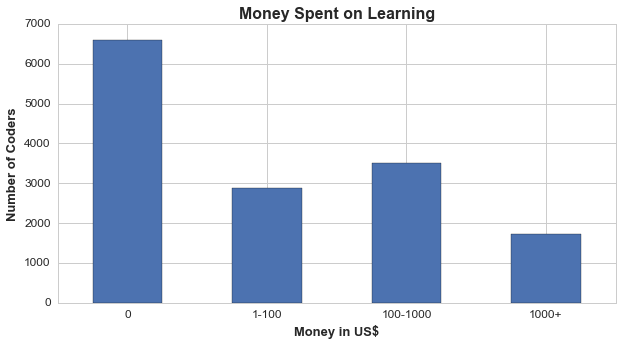

In [11]:
ax = df.MoneyBins.value_counts(sort=False).plot(kind='bar', rot=0, figsize=(10,5))

_ = (ax.set_title('Money Spent on Learning'),
     ax.set_xlabel('Money in US$'),
     ax.set_ylabel('Number of Coders'))

# Exploratory analysis

## Current Income

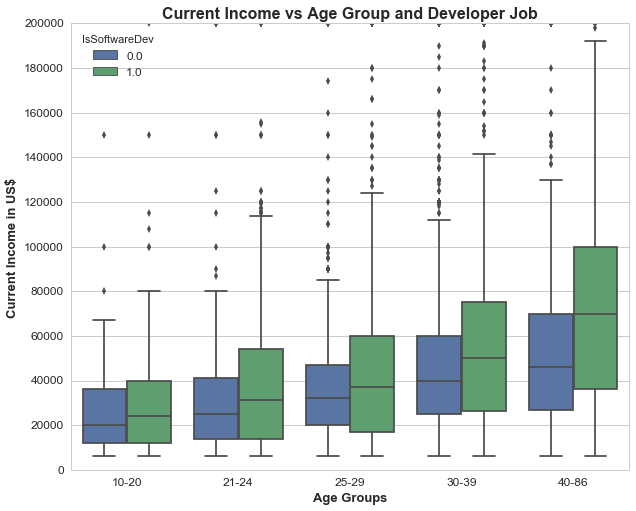

In [131]:
ax = sns.boxplot(data=df, x='AgeGroups', y='Income', hue='IsSoftwareDev')

_ = (ax.set_title('Current Income vs Age Group and Developer Job'),
     ax.set_xlabel('Age Groups'),
     ax.set_ylabel('Current Income in US$'),
     ax.set_ylim(0, 200000),
     ax.set_yticks(np.linspace(0, 200000, 11)),
    )

Current software developers have higher salaries than coders who are not currently working as developers. The difference is especially noticeable in the older population.

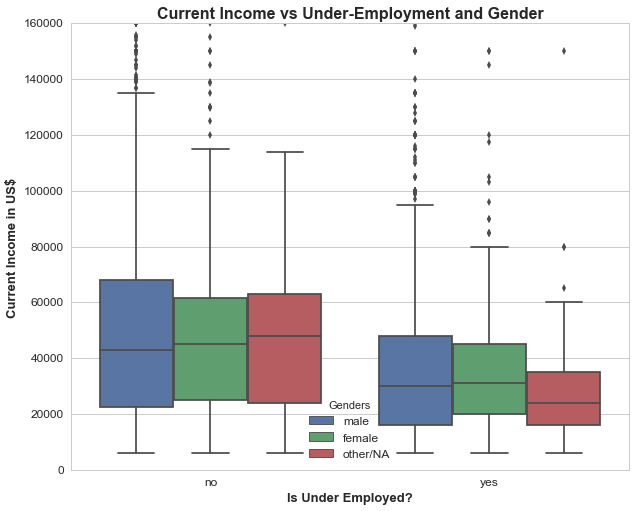

In [209]:
ax = sns.boxplot(data=df, hue='Genders', y='Income', x='IsUnderEmployed')

_ = (ax.set_title('Current Income vs Under-Employment and Gender'),
     ax.set_xlabel('Is Under Employed?'),
     ax.set_xticklabels(['no', 'yes']),
     ax.set_ylabel('Current Income in US$'),
     ax.set_ylim(0, 160000),
     ax.set_yticks(np.linspace(0, 160000, 9)),
    )

Both genders, when under-employed, have lower income than group which is not under-employed.

Let's explore if there are differences between age groups:

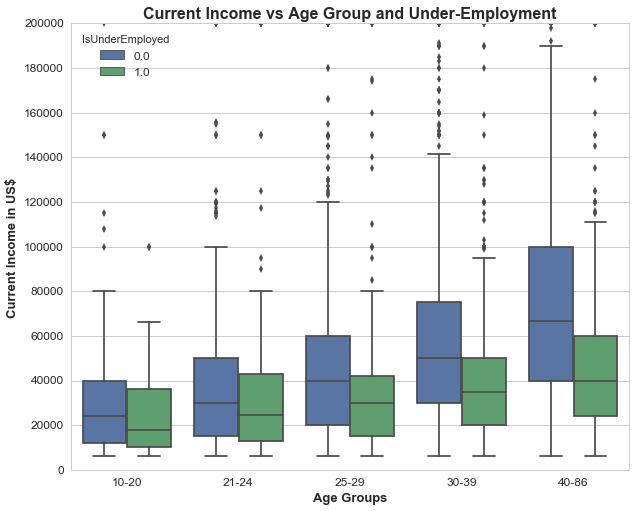

In [10]:
ax = sns.boxplot(data=df, x='AgeGroups', y='Income', hue='IsUnderEmployed')

_ = (ax.set_title('Current Income vs Age Group and Under-Employment'),
     ax.set_xlabel('Age Groups'),
     ax.set_ylabel('Current Income in US$'),
     ax.set_ylim(0, 200000),
     ax.set_yticks(np.linspace(0, 200000, 11)),
    )

We can see that people who are under-employed have lower income in all age groups. And the difference increases with older groups.

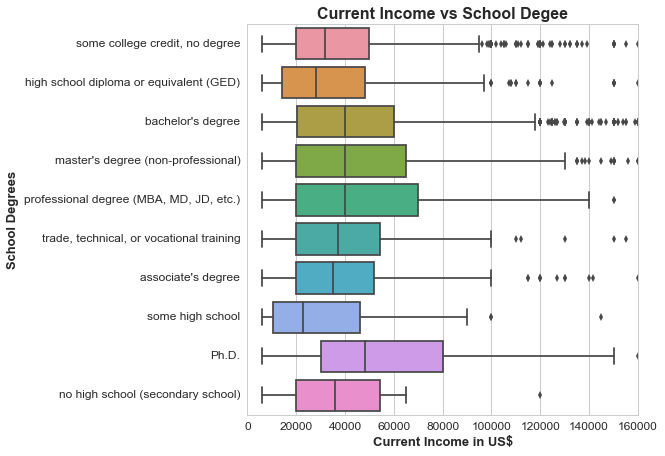

In [289]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.boxplot(data=df, x='Income', y='SchoolDegree', ax=ax, orient='h')

_ = (ax.set_title('Current Income vs School Degree'),
     ax.set_xlabel('Current Income in US$'),
     ax.set_ylabel('School Degree'),
     ax.set_xlim(0, 160000),
     ax.set_xticks(np.linspace(0, 160000, 9)),
    )

In [106]:
no_hi = df.Income[df.SchoolDegree=='no high school (secondary school)'].count()

print('Only {} people with no high school.'.format(no_hi))

Only 47 people with no high school.


Coders with Ph.D. have highest salaries, followed by coders with master's, bachelor's, and professional degrees.

What's interesting here is that people with no high school have higher salaries than people with some high school and people with high school diploma. But - there are only 47 people in that category!

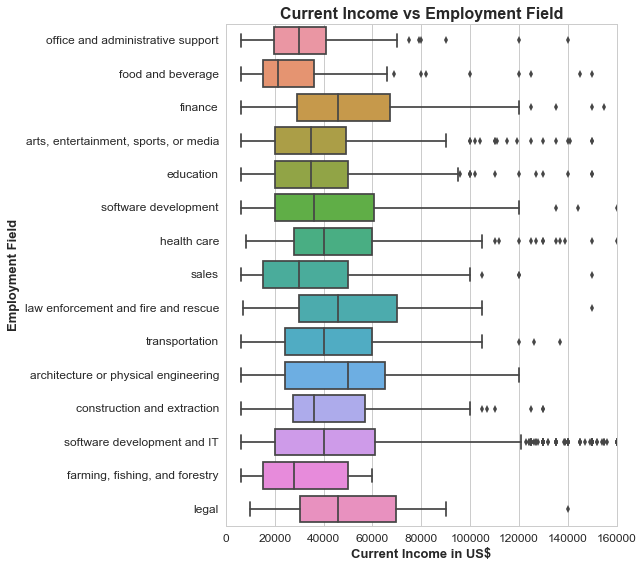

In [210]:
fig, ax = plt.subplots(figsize=(7, 9))

sns.boxplot(data=df, x='Income', y='EmploymentField', ax=ax, orient='h')

_ = (ax.set_title('Current Income vs Employment Field'),
     ax.set_xlabel('Current Income in US$'),
     ax.set_ylabel('Employment Field'),
     ax.set_xlim(0, 160000),
     ax.set_xticks(np.linspace(0, 160000, 9)),
    )

In [111]:
df.Income.groupby(df.EmploymentField).count()

EmploymentField
architecture or physical engineering      126
arts, entertainment, sports, or media     340
construction and extraction               102
education                                 526
farming, fishing, and forestry             17
finance                                   237
food and beverage                         240
health care                               230
law enforcement and fire and rescue        25
legal                                      54
office and administrative support         368
sales                                     272
software development                      112
software development and IT              3581
transportation                            125
dtype: int64

Architecture has highest median salary, followed by finance, law enforcement (only 25 people), and legal (54 people).

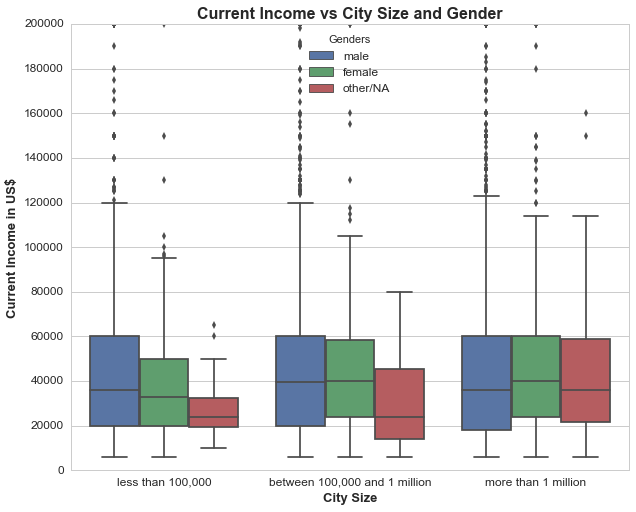

In [113]:
ax = sns.boxplot(data=df, x='CityPopulation', y='Income', hue='Genders',
                 order=['less than 100,000', 
                        'between 100,000 and 1 million', 
                        'more than 1 million'])

_ = (ax.set_title('Current Income vs City Size and Gender'),
     ax.set_xlabel('City Size'),
     ax.set_ylabel('Current Income in US$'),
     ax.set_ylim(0, 200000),
     ax.set_yticks(np.linspace(0, 200000, 11)),
    )

As city size increases, so does female salary!  
In the smallest cities females are slightly underpayed compared to males, but in the biggest cities situation reverses in their favour.  

## Future Earnings

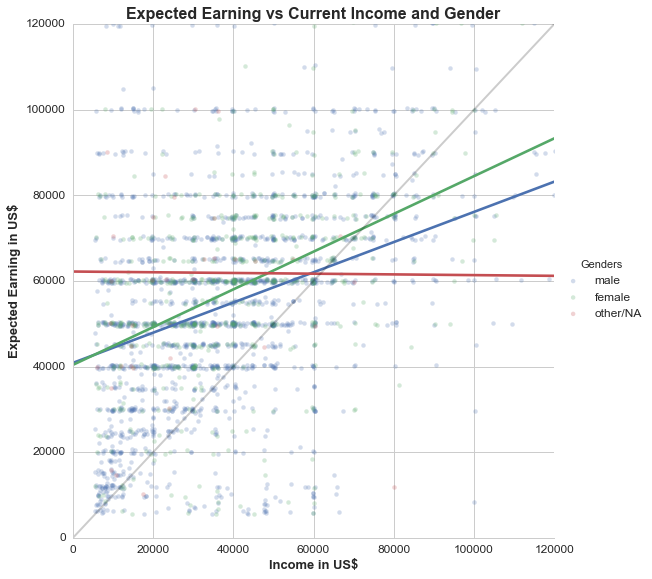

In [126]:
fig = sns.lmplot(data=df, x='Income', y='ExpectedEarning', hue='Genders',
                 fit_reg=True, ci=None, size=8, 
                 x_jitter=500, y_jitter=500,
                 scatter_kws={'alpha':0.25})

_ = (fig.ax.set_title('Expected Earning vs Current Income and Gender'),
     fig.ax.set_xlabel('Current Income in US$'),
     fig.ax.set_ylabel('Expected Earning in US$'),
     fig.ax.set_xlim(0, 120000),
     fig.ax.set_ylim(0, 120000),
     fig.ax.add_line(plt.Line2D((0, 120000), (0, 120000), 
                                linewidth=2, color='black', alpha=0.2)),
    )

It would seem like all people who didn't answer the question about their gender have similar expectations about future salary, regardless of their current income, but the thing is - the sample size is too small:

In [101]:
third_group = df[(df.Genders == 'other/NA') & df.Income.notnull() & df.ExpectedEarning.notnull()].shape[0]

print('Only {} people in the other/NA group in the above chart.'.format(third_group))

Only 40 people in the other/NA group in the above chart.


The thing that first catches the eye is the (almost) empty bottom-right quadrant of the plot:  
- in the group of people who are currently earning more than \$60,000 there are only few of them who expect to earn less than \$60,000 in the future

We can also see that the majority of the points are above the diagonal of the plot:  
- most of people hope/expect they will earn more than they are earning now
- females are sligtly more optimistic about that

Another thing to notice is the slope of the regression lines:
- people with lowest salaries expect to significally increase their earnings
- people with higher salaries think an improvement will be much smaller

We've seen in the previous notebook that median expected earning is \$50,000, and here we can see three pattern-lines forming around it: at 40K, 50K, and 60K.  
Other, not so prominent, lines are forming every 5K in expected earnings, which is as expected (people rounding their answers).

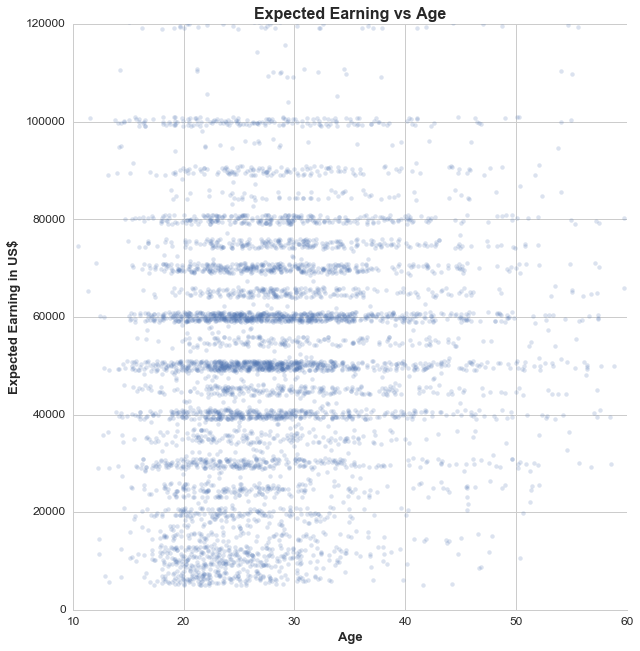

In [158]:
fig = sns.lmplot(data=df, x='Age', y='ExpectedEarning',
                 fit_reg=False, size=9, x_jitter=1, y_jitter=1000,
                 scatter_kws={'alpha':0.2})

_ = (fig.ax.set_title('Expected Earning vs Age'),
     fig.ax.set_xlabel('Age'),
     fig.ax.set_ylabel('Expected Earning in US$'),
     fig.ax.set_xlim(10, 60.05),
     fig.ax.set_ylim(0, 120000),

     fig.ax.set_xlim(10, 60.05),
     fig.ax.set_ylim(0, 120000),
    )

When we plot expected earnings against the age of the participants, we can again see the rounding pattern, but what's more interesting is a group of people around the age of 20 who expect to be earning around \$10,000 per year.

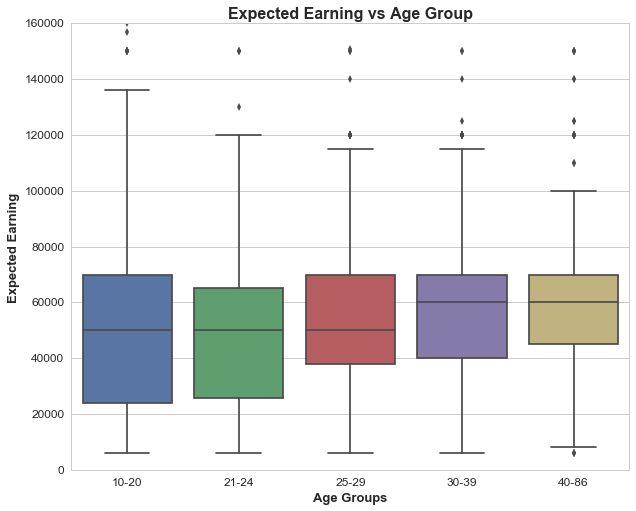

In [296]:
ax = sns.boxplot(data=df, x='AgeGroups', y='ExpectedEarning')

_ = (ax.set_title('Expected Earning vs Age Group'),
     ax.set_xlabel('Age Groups'),
     ax.set_ylabel('Expected Earning in US$'),
     ax.set_ylim(0, 160000),
     ax.set_yticks(np.linspace(0, 160000, 9)),
    
     ax.set_ylim(0, 160000),
     ax.set_yticks(np.linspace(0, 160000, 9)),
    )

Here we can see more easily the higher earning expectations as the age increases. It is especially noticeable in the oldest two groups.

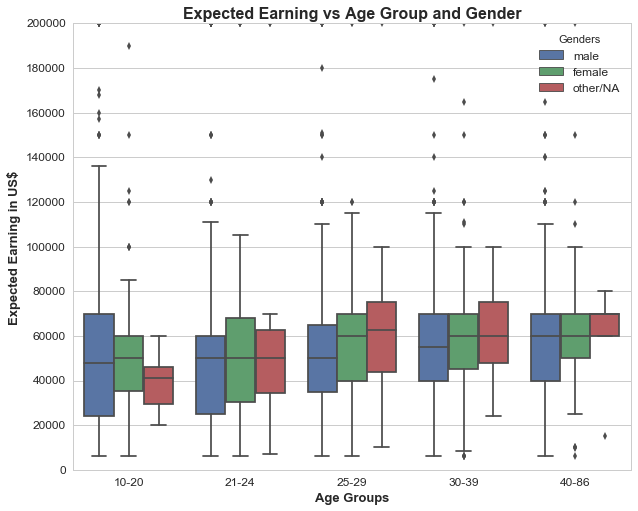

In [133]:
ax = sns.boxplot(data=df, x='AgeGroups', y='ExpectedEarning', hue='Genders')

_ = (ax.set_title('Expected Earning vs Age Group and Gender'),
     ax.set_xlabel('Age Groups'),
     ax.set_ylabel('Expected Earning in US$'),
     ax.set_ylim(0, 200000),
     ax.set_yticks(np.linspace(0, 200000, 11)),

     ax.set_ylim(0, 200000),
     ax.set_yticks(np.linspace(0, 200000, 11)),
    )

When we divide age groups by gender, it is interesting to see that females expect to see slightly higher salaries than males from the same age group.

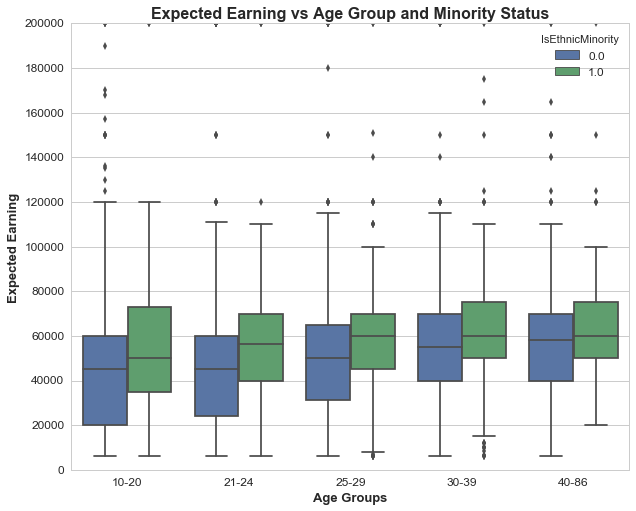

In [116]:
ax = sns.boxplot(data=df, x='AgeGroups', y='ExpectedEarning', hue='IsEthnicMinority')

_ = (ax.set_title('Expected Earning vs Age Group and Minority Status'),
     ax.set_xlabel('Age Groups'),
     ax.set_ylabel('Expected Earning in US$'),
     ax.set_ylim(0, 200000),
     ax.set_yticks(np.linspace(0, 200000, 11)),

     ax.set_ylim(0, 200000),
     ax.set_yticks(np.linspace(0, 200000, 11)),
    )

Ethnic minorities of all ages expect higher salaries in the future.

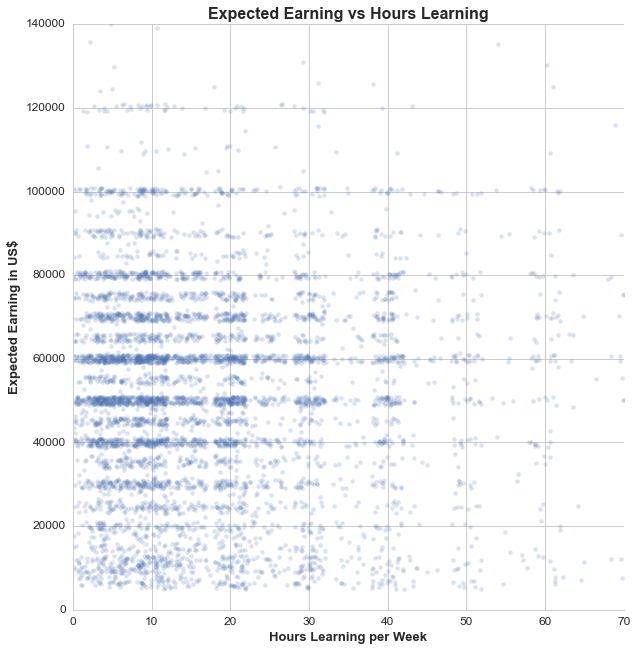

In [108]:
fig = sns.lmplot(data=df, x='HoursLearning', y='ExpectedEarning', 
                 fit_reg=False, size=9, 
                 x_jitter=2, y_jitter=1000,
                 scatter_kws={'alpha':0.2})

_ = (fig.ax.set_title('Expected Earning vs Hours Learning'),
     fig.ax.set_xlabel('Hours Learning per Week'),
     fig.ax.set_ylabel('Expected Earning in US$'),
     fig.ax.set_xlim(0, 70),
     fig.ax.set_ylim(0, 140000),
    )

We can see that people who are learning more hours per week don't expect to have significally higher future salary than those who are learning less.

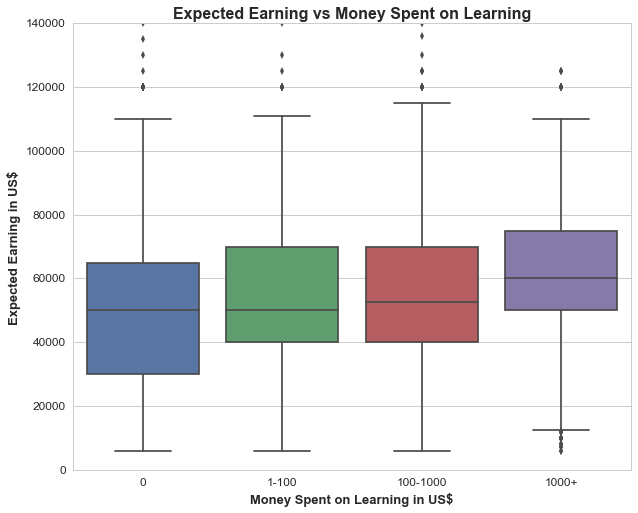

In [230]:
ax = sns.boxplot(data=df, x='MoneyBins', y='ExpectedEarning')

_ = (ax.set_title('Expected Earning vs Money Spent on Learning'),
     ax.set_xlabel('Money Spent on Learning in US$'),
     ax.set_ylabel('Expected Earning in US$'),
     ax.set_ylim(0, 140000)
    )

People who have spent \$1,000 or more on their learning are expecting their future salary to be around \$60,000. All other groups have approximately the same expectation - around \$50,000.

And who are those big-spenders?

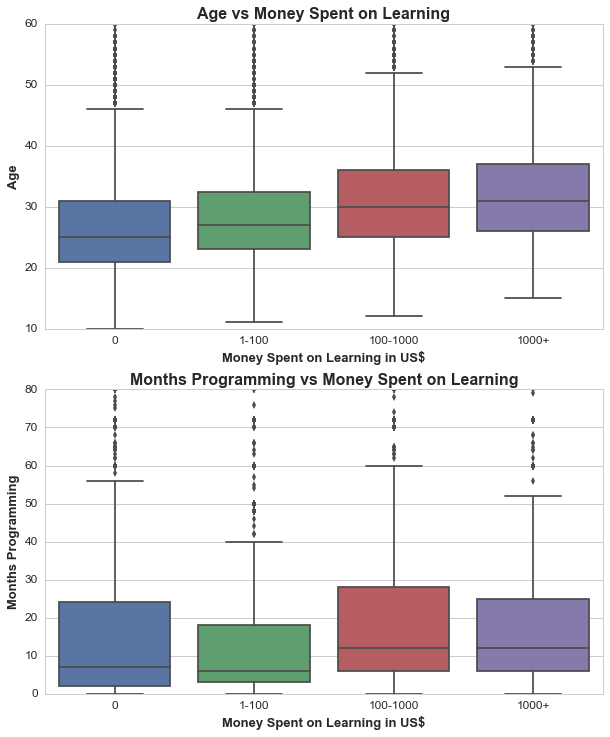

In [251]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

sns.boxplot(data=df, x='MoneyBins', y='Age', ax=ax1)
sns.boxplot(data=df, x='MoneyBins', y='MonthsProgramming', ax=ax2)

_ = (ax1.set_title('Age vs Money Spent on Learning'),
     ax1.set_xlabel('Money Spent on Learning in US$'),
     ax1.set_ylabel('Age'),
     ax1.set_ylim(10, 60),
     
     ax2.set_title('Months Programming vs Money Spent on Learning'),
     ax2.set_xlabel('Money Spent on Learning in US$'),
     ax2.set_ylabel('Months Programming'),
     ax2.set_ylim(0, 80)
    )

People who have spent more money on learning are somewhat older than low-spenders, and they are usually more experienced when it comes to programming.

To summarize this part about expected earning, let's plot the correlation matrix between expected earning and other variables:

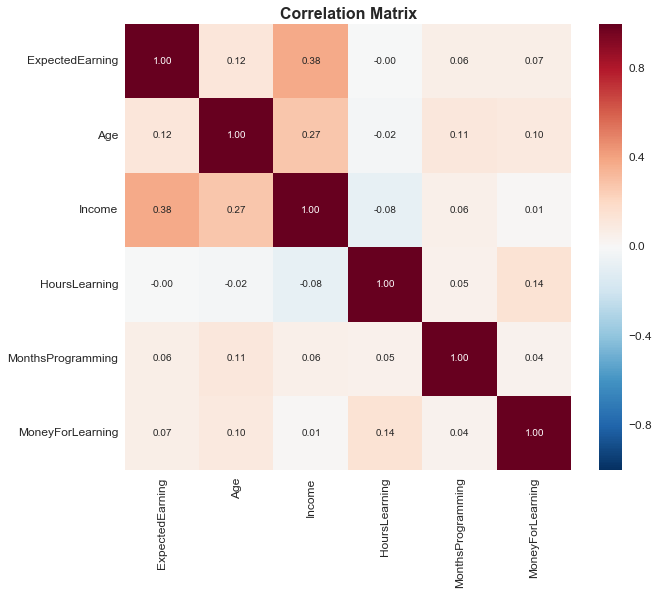

In [47]:
cols = ['ExpectedEarning', 'Age', 'Income', 
        'HoursLearning', 'MonthsProgramming', 'MoneyForLearning']
corr_mat = np.corrcoef(df[cols].dropna(subset=cols).values.T)

ax = sns.heatmap(corr_mat, annot=True, fmt='.2f',
                 xticklabels=cols, yticklabels=cols,
                )

_ = (ax.set_title('Correlation Matrix'))

As we've seen earlier, there's a weak correlation between expected earning and both age and income, and very low correlation between all other variables.

## Programming Experience and Learning Per Week

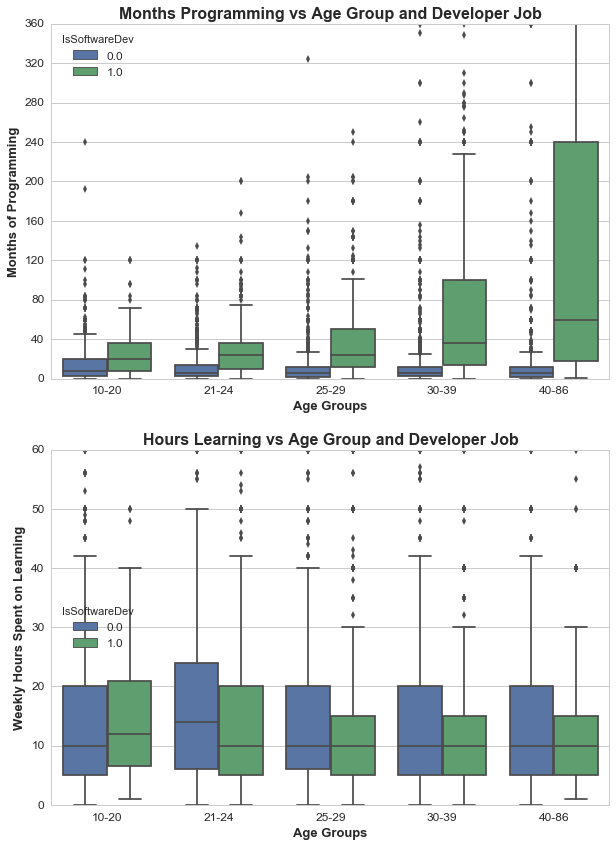

In [127]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,14))

sns.boxplot(data=df, x='AgeGroups', y='MonthsProgramming', hue='IsSoftwareDev', ax=ax1)
sns.boxplot(data=df, x='AgeGroups', y='HoursLearning', hue='IsSoftwareDev', ax=ax2)

_ = (ax1.set_title('Months Programming vs Age Group and Developer Job'),
     ax1.set_xlabel('Age Groups'),
     ax1.set_ylabel('Months of Programming'),
     ax1.set_ylim(0, 360),
     ax1.set_yticks(np.linspace(0, 360, 10)),
     
     ax2.set_title('Hours Learning vs Age Group and Developer Job'),
     ax2.set_xlabel('Age Groups'),
     ax2.set_ylabel('Weekly Hours Spent on Learning'),
     ax2.set_ylim(0, 60),
    )

There's quite significant difference in programming experience between current software developers and the rest of population across all age groups. (As seen more clearly in the table below)  
Non-developers have similar programming experience in all age groups, while developers have more experience the older they are.

Most of the people, reagardless of their age and developer job, tend to learn about 10 hours per week. The only exceptions are non-developers in their early twenties who learn slightly more.

In [160]:
df.MonthsProgramming.groupby(df.IsSoftwareDev).describe().unstack().round()

,count,mean,std,min,25%,50%,75%,max
IsSoftwareDev,,,,,,,,
0.0,10812.0,13.0,28.0,0.0,3.0,6.0,12.0,490.0
1.0,4166.0,53.0,75.0,0.0,12.0,24.0,60.0,720.0


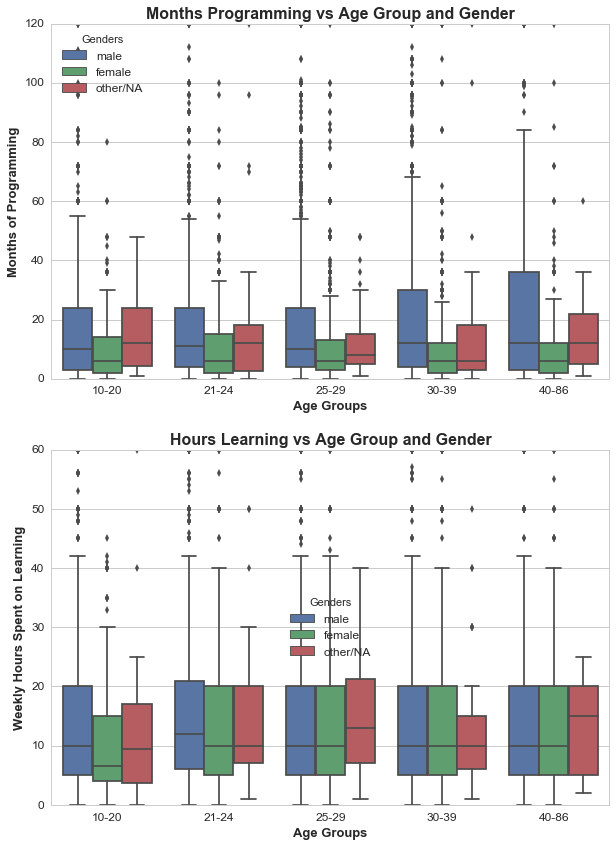

In [118]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,14))

sns.boxplot(data=df, x='AgeGroups', y='MonthsProgramming', hue='Genders', ax=ax1)
sns.boxplot(data=df, x='AgeGroups', y='HoursLearning', hue='Genders', ax=ax2)

_ = (ax1.set_title('Months Programming vs Age Group and Gender'),
     ax1.set_xlabel('Age Groups'),
     ax1.set_ylabel('Months of Programming'),
     ax1.set_ylim(0, 120),
     
     ax2.set_title('Hours Learning vs Age Group and Gender'),
     ax2.set_xlabel('Age Groups'),
     ax2.set_ylabel('Weekly Hours Spent on Learning'),
     ax2.set_ylim(0, 60),
    )

Males of all age groups tend to have more programming experience than females.

When it comes to weekly hours spent on learning, all groups are very similar. The only difference are young males who tend to learn slightly more than females of their age.

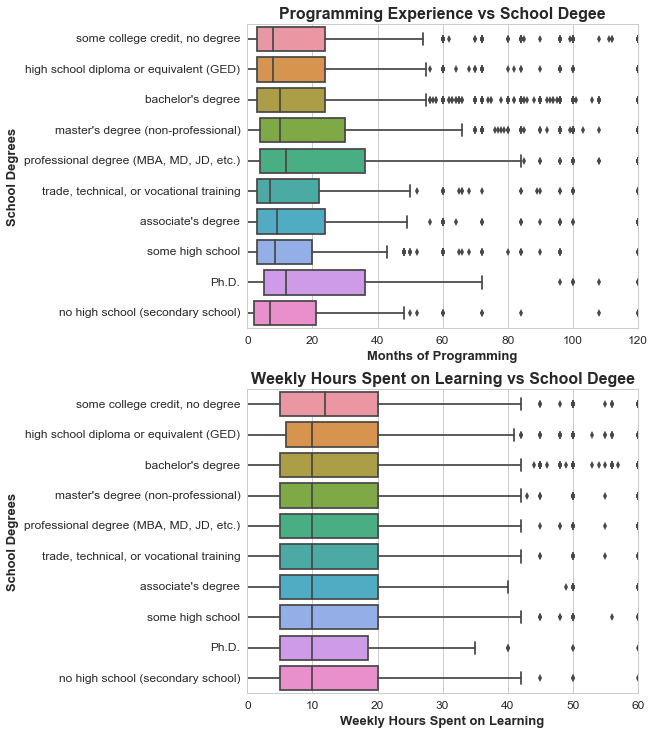

In [115]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,12))

sns.boxplot(data=df, x='MonthsProgramming', y='SchoolDegree', ax=ax1, orient='h')
sns.boxplot(data=df, x='HoursLearning', y='SchoolDegree', ax=ax2, orient='h')

_ = (ax1.set_title('Programming Experience vs School Degree'),
     ax1.set_xlabel('Months of Programming'),
     ax1.set_ylabel('School Degree'),
     ax1.set_xlim(0, 120),
     
     ax2.set_title('Weekly Hours Spent on Learning vs School Degree'),
     ax2.set_xlabel('Weekly Hours Spent on Learning'),
     ax2.set_ylabel('School Degree'),
     ax2.set_xlim(0, 60),
    )

People with Ph.D. and professional degree tend to have more programming experience than people with other school degrees.

When it comes to weekly hours spent on learning, all the groups are practically the same, the only exception are people with some college but no degree.

## Future Jobs

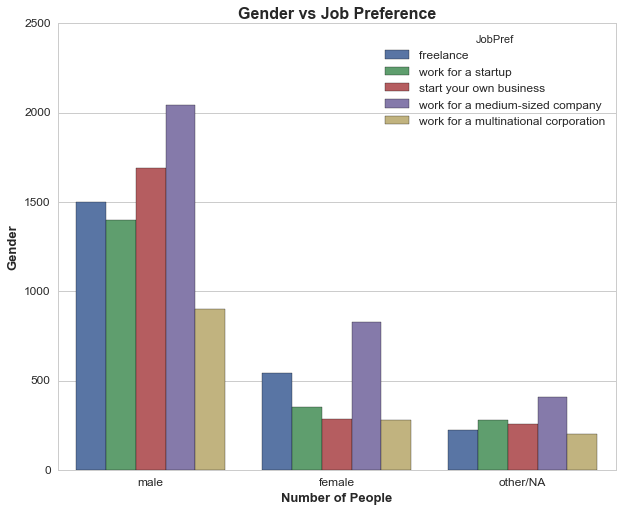

In [272]:
ax = sns.countplot(data=df, x='Genders', hue='JobPref')

_ = (ax.set_title('Gender vs Job Preference'),
     ax.set_xlabel('Number of People'),
     ax.set_ylabel('Gender'),
    )  

Working for a medium-sized company is most wanted job for both genders.

What's interesting is starting own business:
- for males, that's second most wanted job
- for females, that's the least wanted job

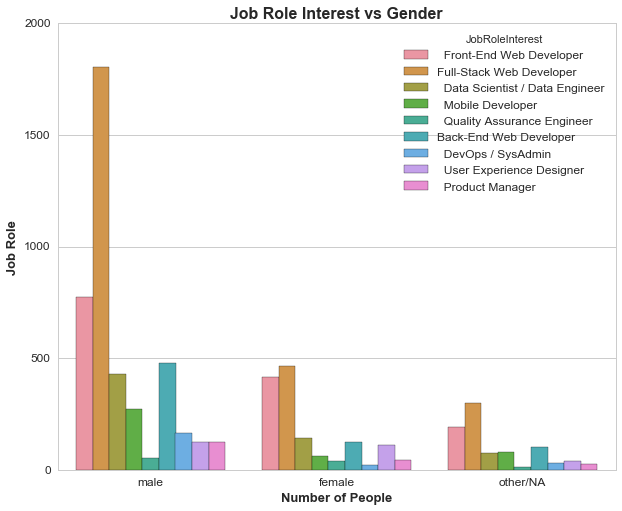

In [275]:
ax = sns.countplot(data=df, x='Genders', hue='JobRoleInterest')

_ = (ax.set_title('Job Role Interest vs Gender'),
     ax.set_xlabel('Number of People'),
     ax.set_ylabel('Job Role'),
    )

Full-stack and front-end web development are the most interesting job roles. The least interesting one is quality assurance.

Females have no interest in becoming SysAdmins, but have higher deire than males to become user experience designers.

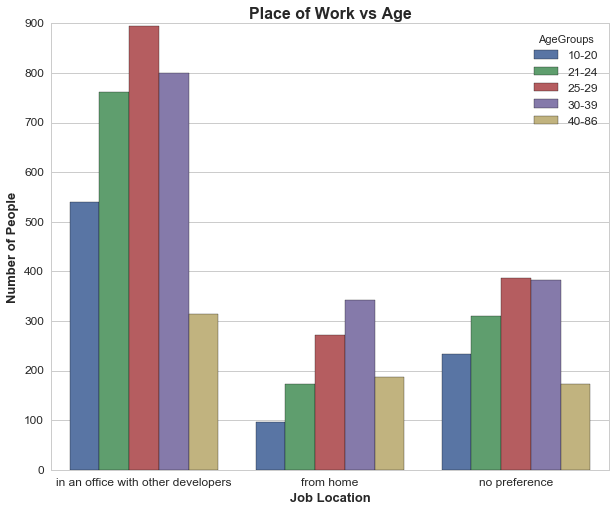

In [285]:
ax = sns.countplot(data=df, x='JobWherePref', hue='AgeGroups')

_ = (ax.set_title('Job Location vs Age'),
     ax.set_xlabel('Job Location'),
     ax.set_ylabel('Number of People'),
    )

Working from home is gaining popularity with increased age.

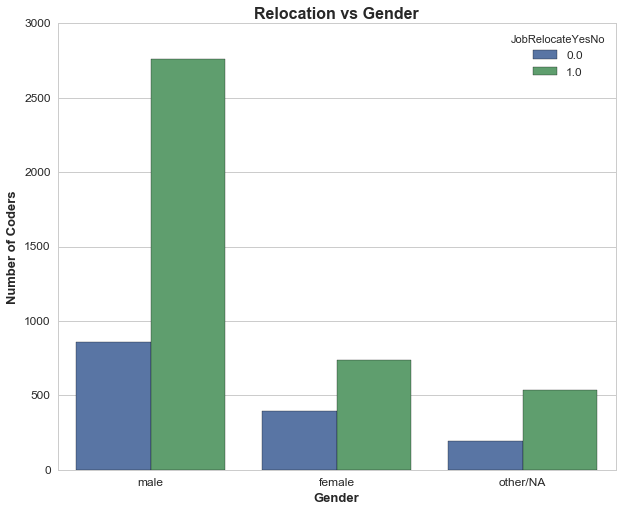

In [276]:
ax = sns.countplot(data=df, x='Genders', hue='JobRelocateYesNo')

_ = (ax.set_title('Relocation vs Gender'),
     ax.set_xlabel('Gender'),
     ax.set_ylabel('Number of Coders'),
    )

Females are more reluctant to relocate for a job than males.

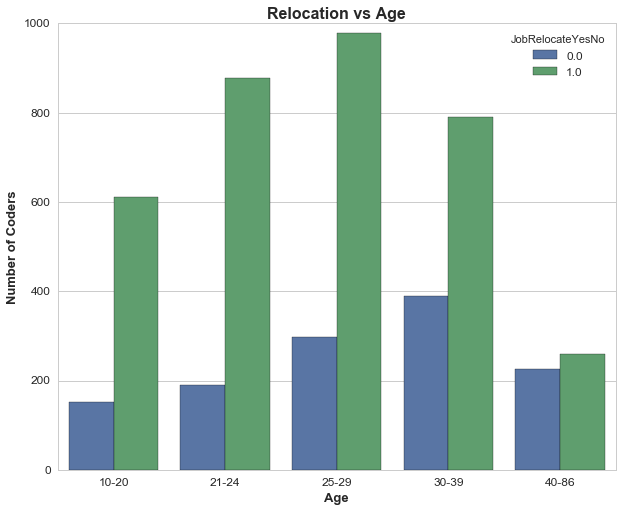

In [277]:
ax = sns.countplot(data=df, x='AgeGroups', hue='JobRelocateYesNo')

_ = (ax.set_title('Relocation vs Age'),
     ax.set_xlabel('Age Groups'),
     ax.set_ylabel('Number of Coders'),
    )

Younger coders are more willing to relocate for a job. Coders in their thirties are more reluctant, and the oldest coders probably have families and children and they wouldn't like to move.

Let's check if the assumption about children is true:

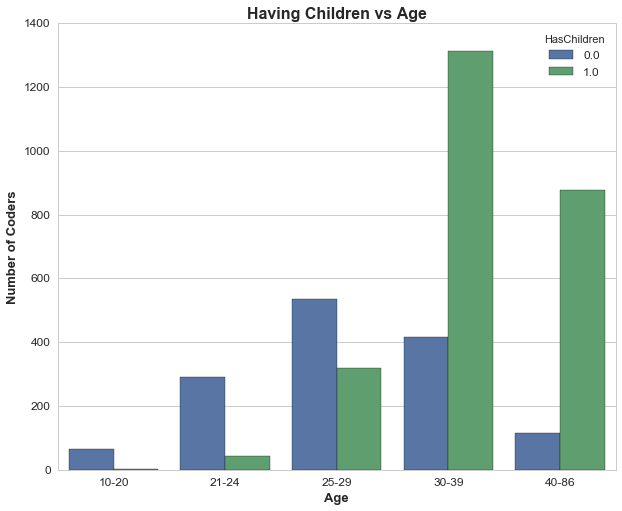

In [270]:
ax = sns.countplot(data=df, x='AgeGroups', hue='HasChildren')

_ = (ax.set_title('Having Children vs Age'),
     ax.set_xlabel('Age Groups'),
     ax.set_ylabel('Number of Coders'),
    )

As expected, people aged 30 and older mostly have children.

# Conclusions

- coders who currently work as software developers have more programming experience and higher current salaries than coders who are not currently working as developers
- coders who feel they are under-employed have lower salaries than those who don't
- female salaries increase with the increase in city size
- most of people hope/expect they will earn more in the future than they are earning now
- coders with 30 years or more, expect higher salaries in the future than their younger colleagues
- females expect slightly higher salaries in the future than males
- ethnic minorities expect higher salaries in the future than coders who are not an ethnic minority
- people who learn more hours per week don't expect higher future salaries than those who learn less
- people who spent more money on learning are usually more experienced than low-spending coders, and they expect it will be an investment that will reap benefits with higher salaries in the future
- males would love to start their own business, while females don't like that idea at all
- web-development jobs (full stack, front-end, and back-end, respectively) are the most interesting job roles
- females are more reluctant to relocate for a job than males
- younger coders are more willing to relocate for a job than older coders